![alt text](statements/T11.png "T11")

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
n = 200

In [3]:
X = np.random.normal(-10, 1, n)

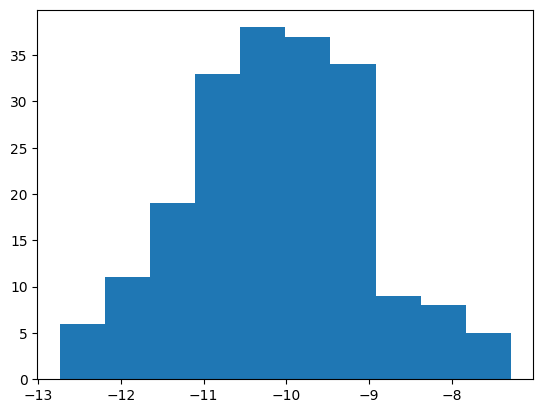

In [4]:
plt.hist(X, bins=10)
plt.show()

In [5]:
print(len(X), np.mean(X), np.std(X))

200 -10.106951804241033 1.0700420386525646


In [6]:
# В задании не сказано про уровень доверия, возьмём стандартные 5%
alpha = 0.05

In [37]:
def get_interval(X, alpha):
    n = len(X)
    mean = np.mean(X)
    z1 = stats.norm.ppf(alpha / 2)
    z2 = stats.norm.ppf(1 - alpha / 2)
    return[mean + z1 / np.sqrt(n), mean + z2 / np.sqrt(n)]

In [38]:
conf_int = get_interval(X, alpha)
conf_int

[-10.245542186676001, -9.968361421806065]

In [39]:
intervals = []
Theta = np.linspace(-10, 10, 201)
for theta in Theta:
    X_theta = np.random.normal(theta, 1, n)
    intervals.append(get_interval(X_theta, alpha))
intervals = np.array(intervals)
ints_T = np.transpose(intervals)
print(np.mean(ints_T[1] - ints_T[0]), np.mean(ints_T[1] - ints_T[0]) * np.sqrt(n))

0.012395900646091019 3.919927969080041


In [40]:
def draw(Theta, intervals):
    fig = plt.figure(figsize=(16, 7))
    for i in range(len(Theta)):
        plt.plot([Theta[i], Theta[i]], intervals[i], 'b')
    plt.plot([-10, 10], [-10, 10], 'g')
    plt.xlabel('θ')
    plt.ylabel('Доверительный интервал')
    plt.title('Доверительные интервалы для разных значений θ')
    plt.show()

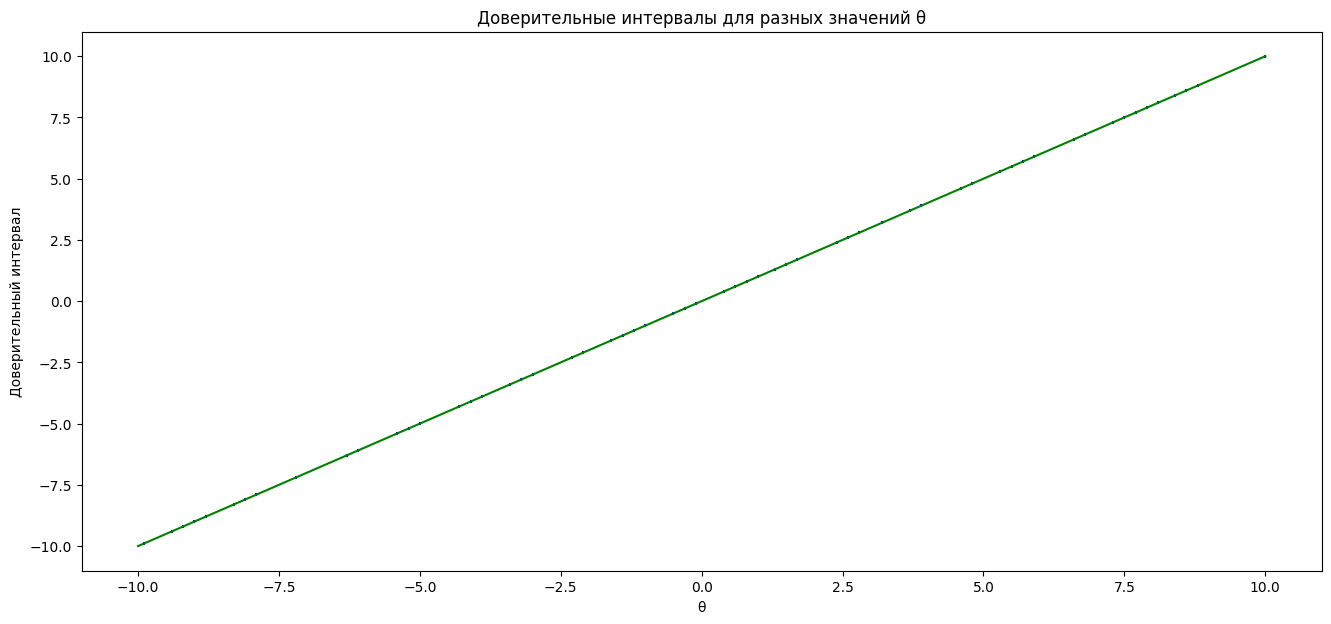

In [41]:
draw(Theta, intervals)

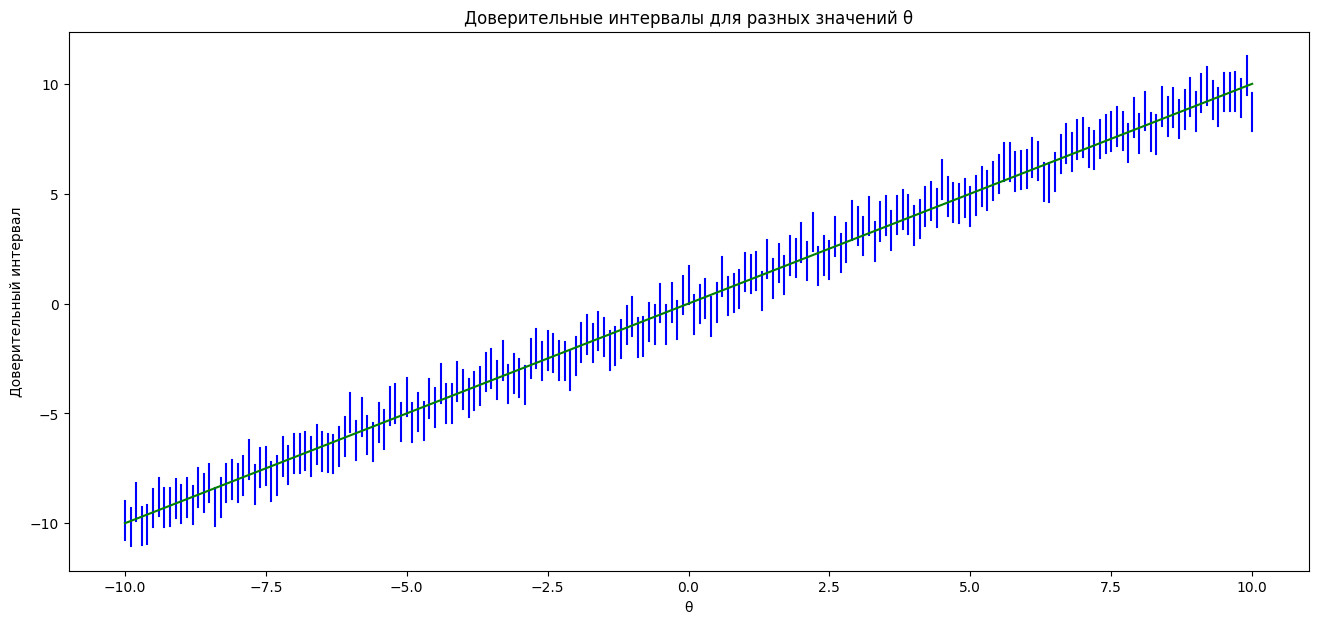

0.9601990049751243


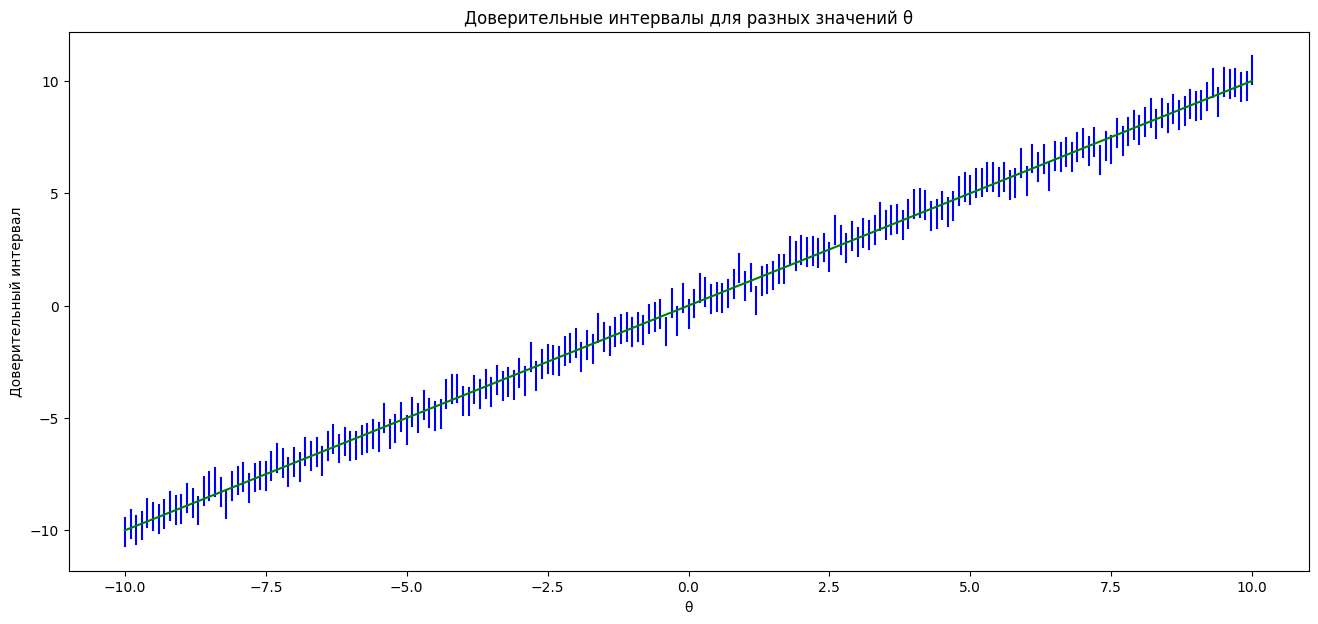

0.9601990049751243


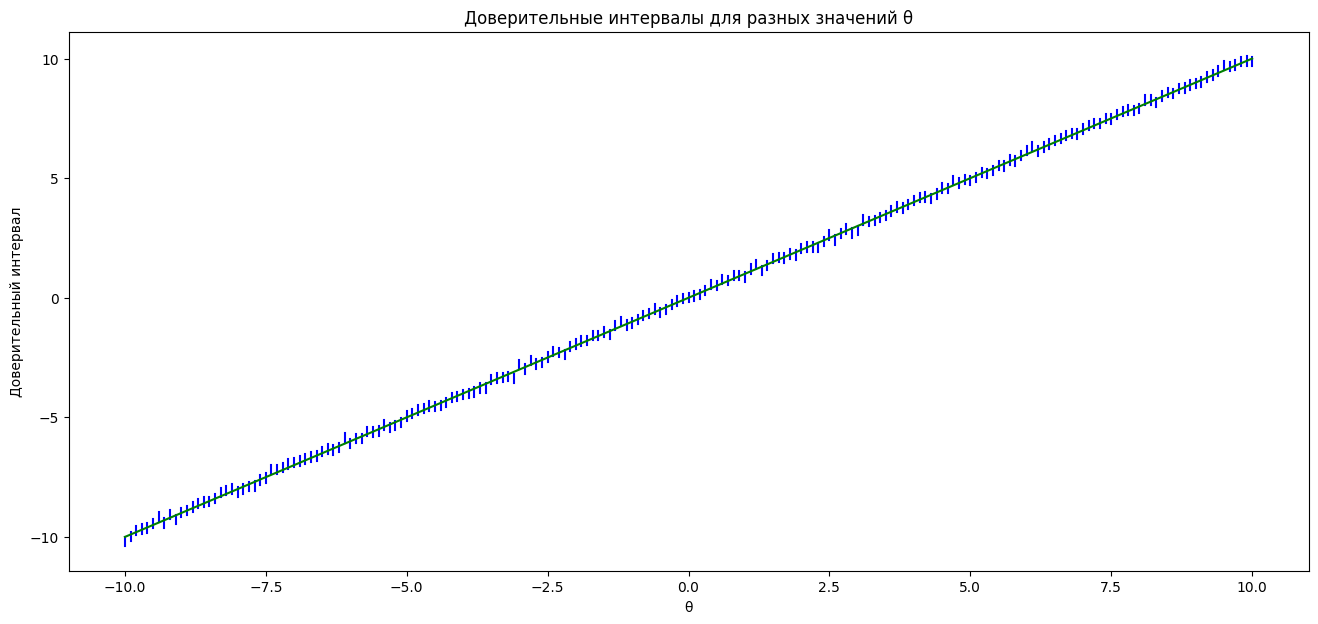

0.9502487562189055


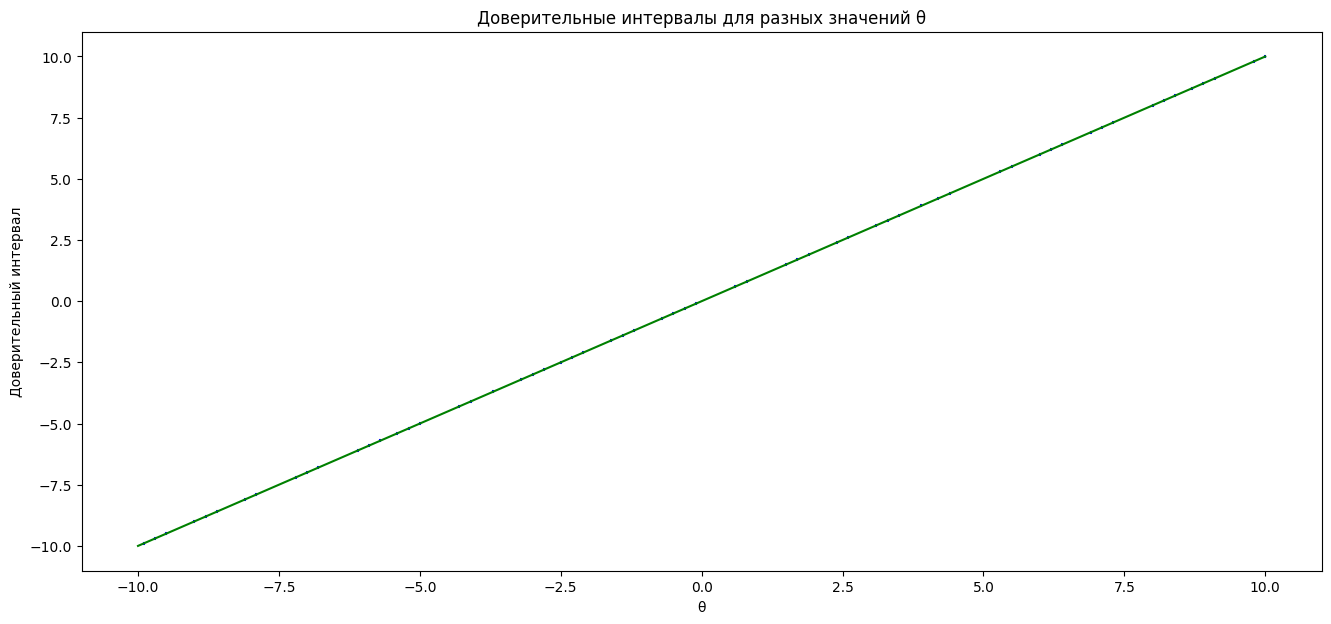

0.9701492537313433


In [43]:
for n in [5, 10, 100, 100000]:
    s = 0
    intervals = []
    Theta = np.linspace(-10, 10, 201)
    for theta in Theta:
        X_theta = np.random.normal(theta, 1, n)
        intervals.append(get_interval(X_theta, alpha))
        s += 1 if intervals[-1][0] < theta and intervals[-1][1] > theta else 0
    draw(Theta, intervals)
    print(s / len(intervals))